In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Set up matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

import astropy.units as u
from astropy.constants import G, h, k_B,au,M_sun
from astropy.visualization import quantity_support

# A) Calculating galaxy mass

 Half-light radius(effective radius) 

In [2]:
#Reff = 29 * u.pc
Reff = u.Quantity(29, unit=u.pc)
Reff.value, Reff.unit

(29.0, Unit("pc"))

In [3]:
Reff.to(u.m)

<Quantity 8.94846499e+17 m>

In [17]:
vmean = 206
sigin = 4.3
v = np.random.normal(vmean, sigin, 500)*u.km/u.s

In [18]:
print("""First 10 radial velocity measurements:
{0}
{1}""".format(v[:10], v.to(u.m/u.s)[:10]))

First 10 radial velocity measurements:
[203.58090722 209.30602712 205.0001759  210.60132966 204.77509839
 205.51468885 205.72761998 206.58722702 206.58538654 204.73734898] km / s
[203580.90722464 209306.02711559 205000.17590244 210601.32965631
 204775.09839072 205514.68885177 205727.61998052 206587.22701893
 206585.38653824 204737.34897635] m / s


In [6]:
quantity_support()

<astropy.visualization.units.quantity_support.<locals>.MplQuantityConverter at 0x6fc2890>

Text(0, 0.5, 'N')

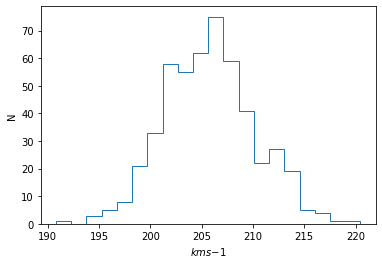

In [23]:
plt.figure()
plt.hist(np.random.normal(vmean, sigin, 500), bins='auto', histtype="step")
plt.ylim()
plt.xlabel('$km s{-1}$')
plt.ylabel("N")

In [19]:
sigma = np.sqrt(np.sum((v - np.mean(v))**2) / np.size(v))
print("Velocity dispersion: {0:.2f}".format(sigma))

Velocity dispersion: 4.18 km / s


$M=4\times\sigma^{2}R_{eff}/G$

In [24]:
M = 4*sigma**2*Reff/G
M

<Quantity 3.03881384e+13 kg km2 pc / m3>

In [26]:
M.decompose()

<Quantity 9.37679973e+35 kg>

In [28]:
print("""Galaxy mass
in solar units: {0:.3g}
SI units: {1:.3g}
CGS units: {2:.3g}""".format(M.to(u.Msun), M.si, M.cgs))

Galaxy mass
in solar units: 4.72e+05 solMass
SI units: 9.38e+35 kg
CGS units: 9.38e+38 g


In [35]:
np.log10(M.to_value(u.Msun))

5.6735344144532425

### Keplerian velocity

In [38]:
v_earth =np.sqrt(G*M_sun/au)
v_earth

<Quantity 29784.69182968 m / s>

In [20]:
def keplerian_velocity(m,r):
    m = m*u.kg
    r = r*u.m
    return np.sqrt(G*m/r)

keplerian velocity of moon

In [22]:
keplerian_velocity(7.342*10**(22),1738100)

<Quantity 1679.05728877 m / s>

# B) Calculating Cloud mass

In [3]:
d = 250 * u.pc
Tex = 25 * u.K

In [4]:
# Cloud's center
cen_ra = 52.25 * u.deg
cen_dec = 0.25 * u.deg
cen_v = 15 * u.km/u.s

# Cloud's size
sig_ra = 3 * u.arcmin
sig_dec = 4 * u.arcmin
sig_v = 3 * u.km/u.s

#1D coordinate quantities
ra = np.linspace(52, 52.5, 100) * u.deg
dec = np.linspace(0, 0.5, 100) * u.deg
v = np.linspace(0, 30, 300) *u.km/u.s

#this creates data cubes of size for each coordinate based on the dimensions of the other coordinates
ra_cube, dec_cube, v_cube = np.meshgrid(ra, dec, v)

data_gauss = np.exp(-0.5*((ra_cube-cen_ra)/sig_ra)**2 +
                    -0.5*((dec_cube-cen_dec)/sig_dec)**2 +
                    -0.5*((v_cube-cen_v)/sig_v)**2 )

In [5]:
data = data_gauss * u.K

In [8]:
np.mean(data),np.median(data),np.std(data)

(<Quantity 0.02050986 K>, <Quantity 2.87906545e-05 K>, <Quantity 0.08265459 K>)

In [6]:
# Average pixel size
# This is only right if dec ~ 0, because of the cos(dec) factor.
dra = (ra.max() - ra.min()) / len(ra)
ddec = (dec.max() - dec.min()) / len(dec)

#Average velocity bin width
dv = (v.max() - v.min()) / len(v)
print("""dra = {0}
ddec = {1}
dv = {2}""".format(dra.to(u.arcsec), ddec.to(u.arcsec), dv))

dra = 18.0 arcsec
ddec = 18.0 arcsec
dv = 0.1 km / s


In [7]:
intcloud = np.sum(data*dv, axis=2)
intcloud.unit

Unit("K km / s")

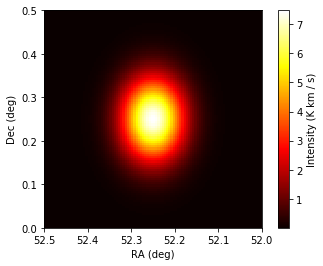

In [8]:
#Note that we display RA in the convential way by going from max to min
plt.imshow(intcloud.value,
           origin='lower',
           extent=[ra.value.max(), ra.value.min(), dec.value.min(), dec.value.max()],
           cmap='hot',
           interpolation='nearest',
           aspect='equal')
plt.colorbar().set_label("Intensity ({})".format(intcloud.unit))
plt.xlabel("RA (deg)")
plt.ylabel("Dec (deg)");

## Measuring The Column Density of CO

#### converting Lambda to frequency

In [9]:
lambda13 = 2.60076 * u.mm
lambda18 = 2.73079 * u.mm

In [11]:
nu13 = lambda13.to(u.Hz, equivalencies=u.spectral())
nu18 = lambda18.to(u.Hz, equivalencies=u.spectral())

A: number of assumptions are required for the following calculation

$C = 3\times 10^{14}(\frac{\nu}{\nu_{13}})^2\frac{A_{13}}{A}K^{-1}cm^{-1}km^{-1}s$

In [12]:
nu13 = 115271096910.13396 * u.Hz
nu18 = 109782318669.689 * u.Hz
A13 = 7.4e-8 / u.s
A18 = 8.8e-8 / u.s

C = 3e14 * (nu18/nu13)**3 * (A13/A18) / (u.K * u.cm**2 * u.km *(1/u.s))
C

<Quantity 2.17924582e+14 s / (cm2 K km)>

$B = \frac{h\nu}{k_{B}T}$

In [14]:
B = h * nu18 / (k_B * Tex)
B

<Quantity 0.21074888 Hz s>

$M = C \frac{\int{T_{B}(V)dV}}{1-e^{-B}}$

In [16]:
NCO = C * np.sum(data*dv, axis=2) / (1 - np.exp(-B))
print("Maximom CO column density: ")
np.max(NCO)

Maximom CO column density: 


<Quantity 8.57820655e+15 1 / cm2>

### CO to Total Mass

In [18]:
H2_CO_ratio = 5.9e6
NH2 = NCO * H2_CO_ratio
print("Peak H2 column density: ")
np.max(NH2)

Peak H2 column density: 


<Quantity 5.06114187e+22 1 / cm2>

We obtain the mass column density by multiplying the number column density by the mass of an individual H2 molecule.

In [19]:
mH2 = 2 * 1.008 * u.Dalton  #aka atomic mass unit/amu
rho = NH2 * mH2

Pixel area

In [21]:
dap = dra * ddec
print(dap)

2.5e-05 deg2


In [24]:
da = (dap * d**2).to(u.pc**2, equivalencies=u.dimensionless_angles())
da

<Quantity 0.00047596 pc2>

In [25]:
da.to(u.cm**2)

<Quantity 4.53185339e+33 cm2>

In [26]:
M = np.sum(rho * da)
M.decompose().to(u.solMass)

<Quantity 317.63786094 solMass>